# **Course One | Neural Networks And Deep Learning**
---
In the first course of the Deep Learning Specialization, the foundational concept of neural networks and deep learning will be studied. 
By the end, I will be familiar with the significant technological trends driving the rise of deep learning; build, train, and apply fully connected deep neural networks; implement efficient (vectorized) neural networks; identify key parameters in a neural network’s architecture; and apply deep learning to my own applications.

## **Week One | Introduction To Deep Learning**
Analyze the major trends driving the rise of deep learning, and give examples of where and how it is applied today.

**Learning Objectives:**
* Discuss the major trends driving the rise of deep learning.
* Explain how deep learning is applied to supervised learning
* List the major categories of models (CNNs, RNNs, etc.), and when they should be applied
* Assess appropriate use cases for deep learning

* Nothing to write here. This week only gave a basic introduction to the topic.

## **Week Two | Neuraal Networks Basics**
Set up a machine learning problem with a neural network mindset and use vectorization to speed up your models.

**Learning Objectives:**

* Build a logistic regression model structured as a shallow neural network
* Build the general architecture of a learning algorithm, including parameter initialization, cost function and gradient calculation, and optimization implemetation (gradient descent)
* Implement computationally efficient and highly vectorized versions of models
* Compute derivatives for logistic regression, using a backpropagation mindset
* Use Numpy functions and Numpy matrix/vector operations
* Work with iPython Notebooks
* Implement vectorization across multiple training examples
* Explain the concept of broadcasting

**This week covered simple neural networks with a binary classification problem using logistic regression from scratch. There is really nothing to write here since everything is in the labs.**

Following are the covered topics:
* A seperate lab for python basics(vectorization/broadcasting)
* Computation graphs
* A lab that classifies the picture as a cat non cat prblem where the following was done:
1. Preprocessing the data
2. Creating functions for each step(intilializing parameters/ optimization(gradient descent)/ etc)
3. Creating a model function that encopsilates everything together.

**Check the labs for further review, since this is already covered in the machine learning specialization.**

## **Week Three | Shallow Neural Network**
Build a neural network with one hidden layer, using forward propagation and backpropagation.

**Learning Objectives:**

* Describe hidden units and hidden layers
* Use units with a non-linear activation function, such as tanh
* Implement forward and backward propagation
* Apply random initialization to your neural network
* Increase fluency in Deep Learning notations and Neural Network Representations
* Implement a 2-class classification neural network with a single hidden layer
* Compute the cross entropy loss

This week was straightforward since it had many intersections with the ML specialization which I'm taking alongside this. Below is the relevant code:

In [1]:
# Here we want to classify a dataset using neural networks, first import the packages:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2023-01-26 04:31:09.362191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 04:31:09.506287: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-26 04:31:09.506308: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-26 04:31:10.206867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Loading the dataset:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X, Y


x, y = load_planar_dataset()

### Exploring the dataset: 

In [3]:
x.shape

(400, 2)

In [4]:
y.shape

(400, 1)

In [5]:
x_df = pd.DataFrame(x, columns=['x1','x2'])
x_df

,x1,x2
0,1.204442,3.576114
1,0.158710,-1.482171
2,0.095247,-1.279955
3,0.349178,-2.064380
4,0.694150,2.889109
...,...,...
395,0.450368,2.408121
396,0.037573,0.891601
397,0.213641,1.732016
398,0.324387,-2.116325


In [6]:
y_df = pd.Series(y.tolist()).to_frame()
df = pd.concat([x_df,y_df],axis=1)
df.rename(columns={df.columns[-1]:'class'}, inplace=True)
df

,x1,x2,class
0,1.204442,3.576114,[0]
1,0.158710,-1.482171,[0]
2,0.095247,-1.279955,[0]
3,0.349178,-2.064380,[0]
4,0.694150,2.889109,[0]
...,...,...,...
395,0.450368,2.408121,[1]
396,0.037573,0.891601,[1]
397,0.213641,1.732016,[1]
398,0.324387,-2.116325,[1]


In [7]:
# we don't want the list format, so let's get rid of it:
df = df.explode('class')
df

,x1,x2,class
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0
3,0.349178,-2.064380,0
4,0.694150,2.889109,0
...,...,...,...
395,0.450368,2.408121,1
396,0.037573,0.891601,1
397,0.213641,1.732016,1
398,0.324387,-2.116325,1


<AxesSubplot:xlabel='x1', ylabel='x2'>

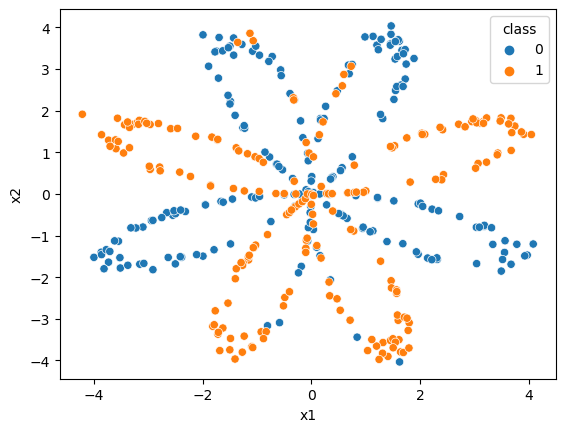

In [8]:
# PLotting the data:
sns.scatterplot(x='x1',y='x2', hue='class', data=df)

### Solving the problem:
We want to classify the dataset into blue and orange so we want to build a decicion boundry that does that. First, let's try logistic regression:

In [9]:
model = LogisticRegression()
model.fit(x,y.ravel())

LogisticRegression()

In [10]:
predictions= model.predict(x)

In [11]:
acc = accuracy_score(predictions, y)
acc*100

47.0

<AxesSubplot:xlabel='x1', ylabel='x2'>

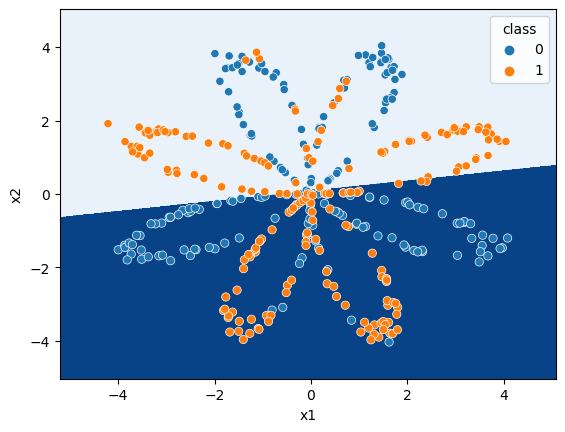

In [12]:
## Plotting the decision boundry:
# Set min and max values and give it some padding.
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
z= model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(yy.shape) # xx also works for they're of the same shape
# Plot the contour and training examples
plt.contourf(xx, yy, z, cmap='Blues')
plt.ylabel('x2')
plt.xlabel('x1')
sns.scatterplot(x='x1',y='x2', hue='class', data=df)

__The accuracy is only 47% using the logistic regression approach, and we can see that the model fits the data poorely from the boundry plotted above.__

__Let's try to solve the problem using the following neural network:__

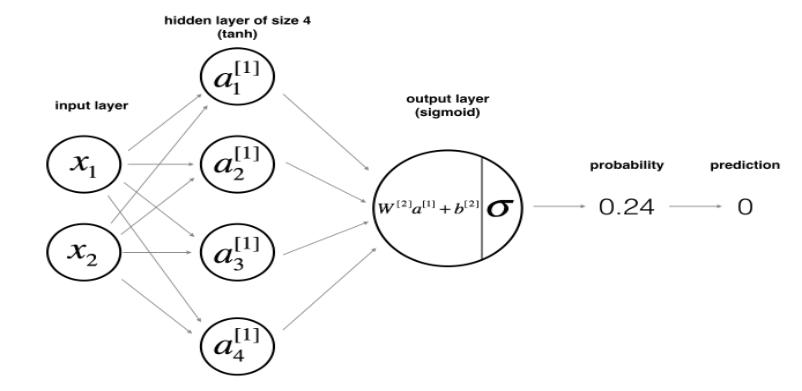

In [13]:
model = Sequential([
                    tf.keras.Input(shape=(2,)),
                    Dense(units=4, activation='tanh'),
                    Dense(units=1, activation='sigmoid')
                    ],
                    name='my_model'
                    )

2023-01-26 04:31:12.039483: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-26 04:31:12.039518: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-26 04:31:12.039541: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hashem-Latitude-E6540): /proc/driver/nvidia/version does not exist
2023-01-26 04:31:12.039812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.15)
             )

In [16]:
model.fit(x,y,epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6990
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6264
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6138
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6067
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6166
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5983
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5979
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5919
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6044
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5820
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5817
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5723
Epoch 13/100
13/13 [=================

In [17]:
predictionstemp = model.predict(x)
predictions = []

for prediction in predictionstemp:
    if prediction >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

13/13 [==============================] - 0s 1ms/step


In [18]:
acc = accuracy_score(predictions,y)
acc*100

67.5

__The accuracy jumped to 90.5%. Let's see the decicion boundry:__

32445/32445 [==============================] - 29s 896us/step


<AxesSubplot:xlabel='x1', ylabel='x2'>

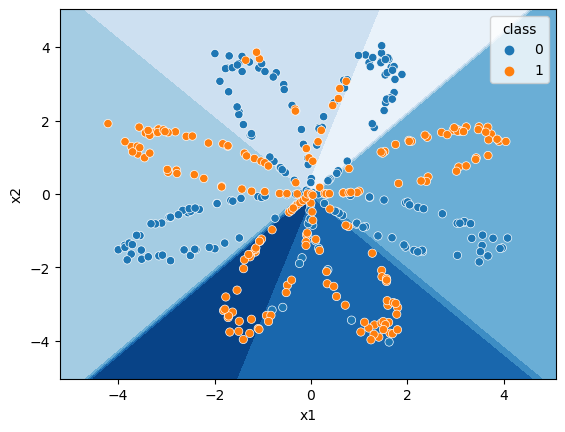

In [19]:
# Set min and max values and give it some padding.
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
z= model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(yy.shape) # xx also works for they're of the same shape
# Plot the contour and training examples
plt.contourf(xx, yy, z, cmap='Blues')
plt.ylabel('x2')
plt.xlabel('x1')
sns.scatterplot(x='x1',y='x2', hue='class', data=df)

## **Week Four | Deep Neural Networks**
Analyze the key computations underlying deep learning, then use them to build and train deep neural networks for computer vision tasks.


**Learning Objectives:**

* Describe the successive block structure of a deep neural network
* Build a deep L-layer neural network
* Analyze matrix and vector dimensions to check neural network implementations
* Use a cache to pass information from forward to back propagation
* Explain the role of hyperparameters in deep learning
* Build a 2-layer neural network

* This week expanded the concept of a neural network to having multiplehidden layers, hence the name.

# **Course Two | Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization**
---
In the second course of the Deep Learning Specialization, you will open the deep learning black box to understand the processes that drive performance and generate good results systematically. 

By the end, you will learn the best practices to train and develop test sets and analyze bias/variance for building deep learning applications; be able to use standard neural network techniques such as initialization, L2 and dropout regularization, hyperparameter tuning, batch normalization, and gradient checking; implement and apply a variety of optimization algorithms, such as mini-batch gradient descent, Momentum, RMSprop and Adam, and check for their convergence; and implement a neural network in TensorFlow.

* __I will treat this course as one week for all the weeks are  aimed at the same goal.__

The first week covered initializations, regularization and gradient checking. The second week covered various optimizations algorithms  like Adam. Finally, the third week covered hypyerparameter tuning in a systematic way.
Following is the code to summarize the whole course:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import scipy.io
import tensorflow as tf


def load_2D_dataset():
    data = scipy.io.loadmat('../../../../../../Desktop/data.mat')
    train_X = data['X']
    train_Y = data['y']
    test_X = data['Xval']
    test_Y = data['yval']

    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

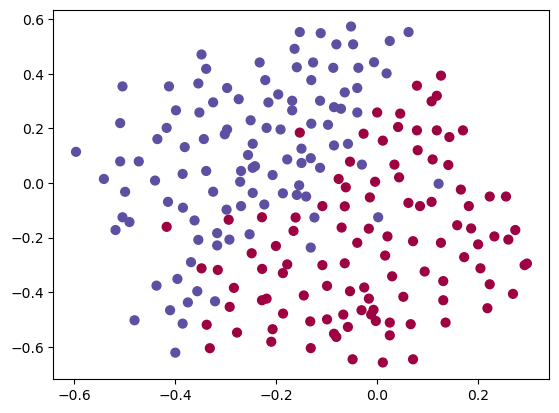

In [21]:
x_train, y_train, x_test, y_test = load_2D_dataset()

In [22]:
x_train.shape

(211, 2)

In [23]:
y_train.shape

(211, 1)

In [24]:
# preprocessing:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Logistic regression:

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train.ravel())

LogisticRegression()

In [26]:
from sklearn.metrics import accuracy_score
yhat = lr.predict(x_test_scaled)
acc = accuracy_score(yhat, y_test)
acc

0.93

We managed to get 93% accuracy using logistic regression. Let's use neural networks to get a better result.

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
initializer = tf.keras.initializers.HeNormal()
regularizer = tf.keras.regularizers.L2(0.01)
model = Sequential([
                   tf.keras.Input(shape=x_train_scaled.shape[1]),
                   Dense(units=100, activation='relu', kernel_regularizer=regularizer),# kernel_initializer=initializer),
                   Dense(units=50, activation='relu', kernel_regularizer=regularizer),
                   Dense(units=25, activation='relu'),
                   Dense(units=1, activation='sigmoid')
                   ])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               300       
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 6,651
Trainable params: 6,651
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.005),
              metrics='accuracy'
             )

In [31]:
model.fit(x_train_scaled, y_train,batch_size=32, epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 4ms/step - loss: 1.2191 - accuracy: 0.7251
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8083 - accuracy: 0.9052
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5709 - accuracy: 0.9147
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.9242
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.9289
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3404 - accuracy: 0.9194
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.9384
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.9242
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2854 - accuracy: 0.9289
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3018 - accuracy: 0.9052
Epoch 11/100
7/7 [===========

In [32]:
predictions = model.predict(x_train_scaled)
yhat = []
for prediction in predictions:
    if prediction>= 0.5:
        yhat.append(1)
    else:
        yhat.append(0)

yhat = np.array(yhat)
acc_train = accuracy_score(yhat, y_train)

predictions = model.predict(x_test_scaled)
yhat = []
for prediction in predictions:
    if prediction>= 0.5:
        yhat.append(1)
    else:
        yhat.append(0)
        
yhat = np.array(yhat)
acc_test = accuracy_score(yhat, y_test)

print(f'Training accuracy= {acc_train}, Testing accuracy: {acc_test}')

7/7 [==============================] - 0s 1ms/step
Training accuracy= 0.9383886255924171, Testing accuracy: 0.94


We managed to avhieve a 94.5% accuracy using the neural networks.